-0.3093925,0.63008295
0.1086400,-1.75774393
-0.5051723,0.04238128
0.9809586,-0.68495005
-0.3208926,-0.82578045
0.2160265,-0.68354891


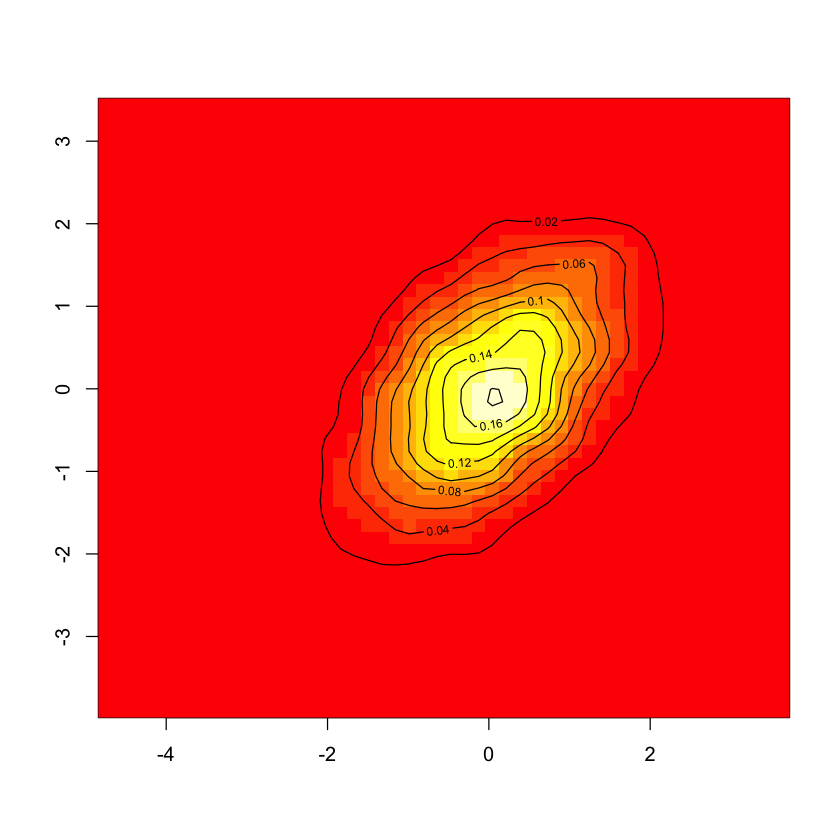

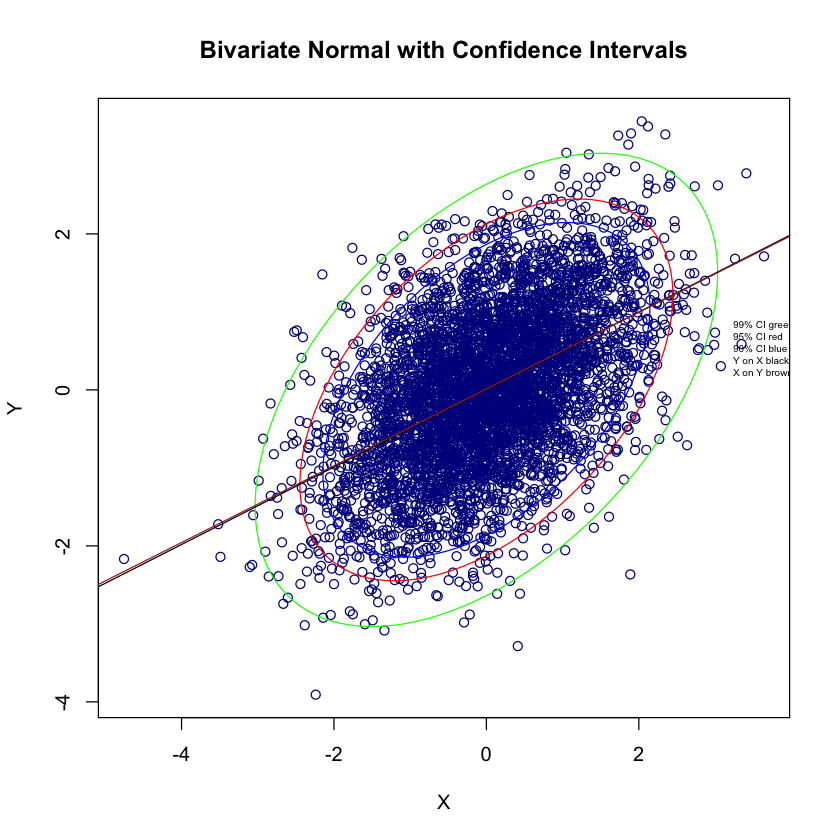

ERROR: Error: package or namespace load failed for ‘rgl’


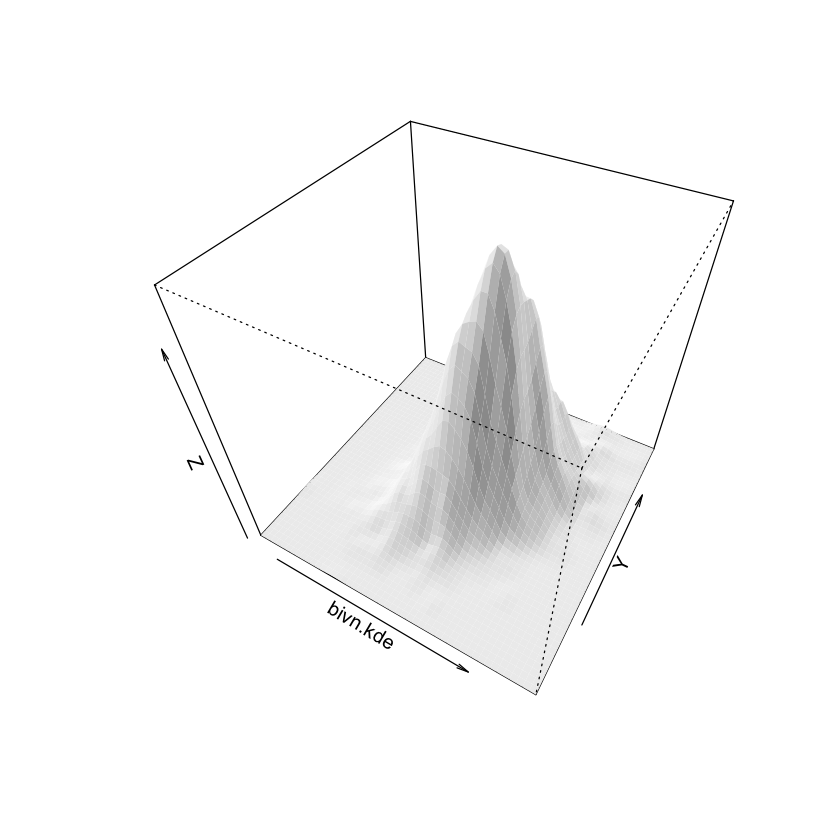

In [12]:
#DEMO FROM http://blog.revolutionanalytics.com/2016/02/multivariate_data_with_r.html

# SIMULATING MULTIVARIATE DATA
# https://stat.ethz.ch/pipermail/r-help/2003-September/038314.html
# lets first simulate a bivariate normal sample
library(MASS)
# Simulate bivariate normal data
mu <- c(0,0)                         # Mean
Sigma <- matrix(c(1, .5, .5, 1), 2)  # Covariance matrix
# > Sigma
# [,1] [,2]
# [1,]  1.0  0.1
# [2,]  0.1  1.0
 
# Generate sample from N(mu, Sigma)
bivn <- mvrnorm(5000, mu = mu, Sigma = Sigma )  # from Mass package
head(bivn)                                      
# Calculate kernel density estimate
bivn.kde <- kde2d(bivn[,1], bivn[,2], n = 50)   # from MASS package

# Contour plot overlayed on heat map image of results
image(bivn.kde)       # from base graphics package
contour(bivn.kde, add = TRUE)     # from base graphics package


# Classic Bivariate Normal Diagram
library(ellipse)
rho <- cor(bivn)
y_on_x <- lm(bivn[,2] ~ bivn[,1])    # Regressiion Y ~ X
x_on_y <- lm(bivn[,1] ~ bivn[,2])    # Regression X ~ Y
plot_legend <- c("99% CI green", "95% CI red","90% CI blue",
                 "Y on X black", "X on Y brown")
 
plot(bivn, xlab = "X", ylab = "Y",
     col = "dark blue",
     main = "Bivariate Normal with Confidence Intervals")
lines(ellipse(rho), col="red")       # ellipse() from ellipse package
lines(ellipse(rho, level = .99), col="green")
lines(ellipse(rho, level = .90), col="blue")
abline(y_on_x)
abline(x_on_y, col="brown")
legend(3,1,legend=plot_legend,cex = .5, bty = "n")


# Three dimensional surface
# Basic perspective plot
persp(bivn.kde, phi = 45, theta = 30, shade = .1, border = NA) # from base graphics package
 
# RGL interactive plot
library(rgl)
col2 <- heat.colors(length(bivn.kde$z))[rank(bivn.kde$z)]
persp3d(x=bivn.kde, col = col2)

# threejs Javascript plot
library(threejs)
# Unpack data from kde grid format
x <- bivn.kde$x; y <- bivn.kde$y; z <- bivn.kde$z
# Construct x,y,z coordinates
xx <- rep(x,times=length(y))
yy <- rep(y,each=length(x))
zz <- z; dim(zz) <- NULL
# Set up color range
ra <- ceiling(16 * zz/max(zz))
col <- rainbow(16, 2/3)
# 3D interactive scatter plot
scatterplot3js(x=xx,y=yy,z=zz,size=0.4,color = col[ra],bg="black")

In [15]:
library(rgl)

ERROR: Error: package or namespace load failed for ‘rgl’
